In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import backend as K

#### Patrones de aprendizaje

In [17]:
ntrain = 4 #Cantidad de patrones para entrenar
x_train = np.zeros((ntrain, 3), dtype = np.float32) #Entradas
y_train = np.zeros((ntrain, 1), dtype = np.float32) #Salidas

x_train[0][0] = 1
x_train[0][1] = 1
y_train[0] = 1

x_train[1][0] = 1
x_train[1][1] = -1
y_train[1] = -1

x_train[2][0] = -1
x_train[2][1] = 1
y_train[2] = -1

x_train[3][0] = -1
x_train[3][1] = -1
y_train[3] = 1

#Neurona de bias en la capa de entrada
for i in range(ntrain):
    x_train[i][2] = -1

#### Funciones

In [18]:
def MSE(y_esp, y_obt):
    '''
    Recibe el vector de patrones de salidas esperadas y obtenidas (escalares) y calcula el error cuadrático
    '''
    e = 0
    for i in range(len(y_esp)):
        for j in range(len(y_esp[0])):
            e += (y_esp[i][j] - y_obt[i][j])**2
    
    e = 0.5*e

    return e

def g(x):
    return np.tanh(x)

def g_pr(x):
    y = 1 - np.tanh(x)**2
    return y

def v1_accuracy(y_true, y_pred):
    return np.mean(K.mean(K.equal(y_true, K.round(y_pred)), axis=-1))

#### Variables para el loop de aprendizaje

In [19]:
r = 100 #Cantidad de realizaciones
lr = 0.5 #learning rate
epocas = 1000

#Vectores para luego analizar el desempeño promedio de la red
accuracy = np.zeros(shape=(epocas, r))
mse = np.zeros(shape=(epocas, r))

### Loop de aprendizaje (Retropropagación de errores)

In [20]:
for i in range(r):
    print("\nRealizacion " + str(i))

    #En cada realización, inicializo aleatoriamente los parámetros de la red
    w1 = np.random.normal(loc=0, scale=1, size=(3,2)) #Capa 1 afectada por capa 0
    w2 = np.random.normal(loc=0, scale=1, size=(3,)) #Capa 2 afectada por capa 1

    #Módulos de las correcciones
    deltas1 = np.zeros(epocas) #Módulo del vector deltaW1
    deltas2 = np.zeros(epocas)  #Módulo del vector deltaW2

    #Salida de la red para cada época
    salidas = np.zeros((ntrain, 1), dtype = np.float32) #Salidas #Registro las salidas predichas y calculo accuracy


    for k in range(epocas):
        deltaW1 = np.zeros(shape=(3,2))
        deltaW2 = np.zeros(shape=(3,))

        for mu in range(ntrain):

        #FORWARD PROPAGATION (entrada)
            #Capa de entrada
            c0 = x_train[mu]

            #Capa oculta
            h1 = np.dot(c0,w1)
            c1 = g(h1)

            #Capa de salida
            h2 = np.dot(np.concatenate([c1, [c0[2]]]), w2)
            c2 = g(h2) #output
            salidas[mu] = c2

        #BACK PROPAGATION (delta)    
            delta2 = (y_train[mu] - c2)*g_pr(h2)

            delta1 = delta2*w2[:-1]*g_pr(h1) #No tengo que backpropagar el delta a la neurona del bias (omito el último elemento de w2)

        #FORWARD PROPAGATION (correccion)
            deltaW1 += lr * c0[:, np.newaxis] * delta1 #doy vuelta c0 para obtener el producto vectorial

            deltaW2 += lr * np.concatenate([c1, [c0[2]]]) * delta2

        w1 += deltaW1
        w2 += deltaW2

        deltas1[k] = np.linalg.norm(deltaW1)
        deltas2[k] = np.linalg.norm(deltaW2)
        mse[k, i] = MSE(y_train, salidas)
        accuracy[k, i] = v1_accuracy(y_train, salidas)


    print("Matrices de pesos finales")
    print(w1)
    print(w2)
    print("MSE final")
    print(mse[-1, i])


        


Realizacion 0
Matrices de pesos finales
[[-1.95121663 -1.53426042]
 [-1.96290495 -1.53716518]
 [ 1.87447025 -1.33916891]]
[ 2.682531   -2.71351573 -2.44406181]
MSE final
0.0005646842358810744

Realizacion 1
Matrices de pesos finales
[[-2.60907679  2.84337083]
 [ 0.62183622  1.08281315]
 [-2.45536511  2.86622258]]
[ 1.97855441  1.80824339 -0.39597389]
MSE final
1.2638742704608052

Realizacion 2
Matrices de pesos finales
[[-2.04487338 -1.68760236]
 [ 1.86972992  1.63948904]
 [-1.92393408  1.46563623]]
[ 2.72830674 -2.73766417  2.50946579]
MSE final
0.0004149420866319531

Realizacion 3
Matrices de pesos finales
[[ 1.96110214 -2.11207776]
 [-1.90667451  1.87708838]
 [ 1.60912282  1.99319579]]
[-2.66328146 -2.68654095  2.47275057]
MSE final
0.000412288903316238

Realizacion 4
Matrices de pesos finales
[[ 1.96238588 -1.52105294]
 [ 2.10115945 -1.54746119]
 [ 1.99559237  1.33009363]]
[ 2.75853252  2.79127984 -2.52156525]
MSE final
0.0004142385958978423

Realizacion 5
Matrices de pesos finale

#### Gráficos

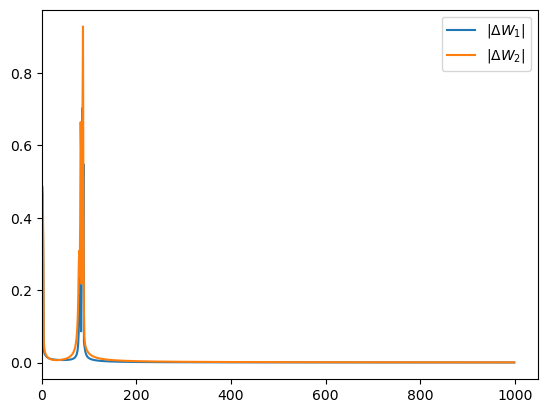

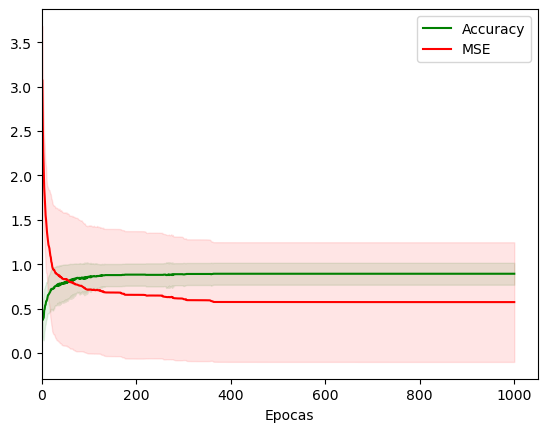

In [21]:
plt.figure()
plt.plot(deltas1, label = "|$\Delta W_1$|")
plt.plot(deltas2, label = "|$\Delta W_2$|")
plt.legend()
plt.xlim(0)
plt.show()


acc_mean = np.mean(accuracy, axis = 1)
acc_std = np.std(accuracy, axis=1)
mse_mean = np.mean(mse, axis = 1)
mse_std = np.std(mse, axis=1)

plt.figure()
plt.fill_between(range(1, epocas + 1), acc_mean - acc_std, acc_mean + acc_std, color='g', alpha=0.1)
plt.fill_between(range(1, epocas + 1), mse_mean - mse_std, mse_mean + mse_std, color='r', alpha=0.1)
plt.plot(range(1, epocas + 1), acc_mean, color='g', label='Accuracy')
plt.plot(range(1, epocas + 1), mse_mean, color='r', label='MSE')
plt.xlabel("Epocas")
plt.legend()
plt.xlim(0)
plt.show()